In [18]:
#导入数据集合
import numpy as np

def load_data(filename,splitstyle = "\t"):
    dataset = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(splitstyle)
        m = len(lineArr)
        dataset.append(lineArr[0:m])
    return np.array(dataset,dtype=np.float64)
    


(1000L, 2L)


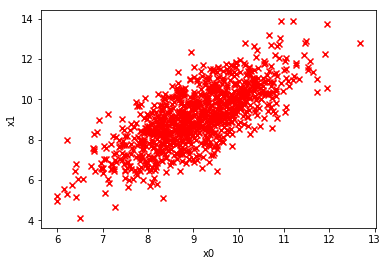

In [19]:
x = load_data("pca/testSet.txt")
print x.shape

import matplotlib.pyplot as plt
#可视化一下数据集合
plt.scatter(x[:,0],x[:,1],marker='x',color = 'r')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()



In [20]:
def pca(x,k):
    x_mean = np.mean(x,axis=0)
    x_nor = x - x_mean
    x_cov = np.cov(x_nor,rowvar=0) #协方差矩阵 [n,n]
    
    eigvals,eigVecs = np.linalg.eig(x_cov) #计算协方差矩阵的特征值和特征向量

    eigvals_sortindex = np.argsort(eigvals) #对特征值进行排序 
    k_index = eigvals_sortindex[: -(k+1):-1] #取出 最后的k个（因为是从小到大排序的）所以倒过来数
    k_eigVecs = eigVecs[:,k_index] #只要最大的k个特征向量 [n,k]
    
    lowData = x_nor.dot(k_eigVecs) #降维的数据(m.k) =[m,n]*[n,k]
    recData = lowData.dot(k_eigVecs.T) + x_mean #恢复的数据(m,n) 加上x_mean,是为了还原到原来的范围
    
    return lowData,recData
    

In [21]:
lowData , recData = pca(x,k=1)
print lowData.shape
print recData.shape

(1000L, 1L)
(1000L, 2L)


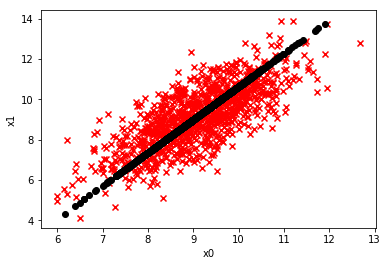

In [22]:
#可视化一下原始数据集合 以及 第一成分表示的集合
def plotFunc(x,recData):
    plt.scatter(x[:,0],x[:,1],marker='x',color = 'r')
    plt.scatter(recData[:,0],recData[:,1],marker="o",color="black")
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.show()

plotFunc(x,recData)


In [23]:
def pca1(x,k):
    x_mean = np.mean(x,axis=0)
    x_nor = x - x_mean
    x_cov = np.cov(x_nor,rowvar=0) #协方差矩阵 [n,n]
    u,s,v = np.linalg.svd(x_cov)  #协方差的svd分解和特征值分解结果一样
    eigvals,eigVecs = s,u

    eigvals_sortindex = np.argsort(eigvals) #对特征值进行排序 
    k_index = eigvals_sortindex[: -(k+1):-1] #取出 最后的k个（因为是从小到大排序的）所以倒过来数
    k_eigVecs = eigVecs[:,k_index] #只要最大的k个特征向量 [n,k]
    
    lowData = x_nor.dot(k_eigVecs) #降维的数据(m.k) =[m,n]*[n,k]
    recData = lowData.dot(k_eigVecs.T) + x_mean #恢复的数据(m,n) 加上x_mean,是为了还原到原来的范围
    
    return lowData,recData


(1000L, 1L)
(1000L, 2L)


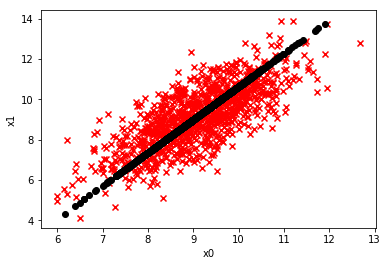

In [24]:
lowData1 , recData1 = pca1(x,k=1)
print lowData1.shape
print recData1.shape

plotFunc(x,recData1)




In [25]:
def pca2(x,k):
    x_mean = np.mean(x,axis=0)
    x_nor = x - x_mean
   
    u,s,v = np.linalg.svd(x_nor)  #svd分解的v的列向量是xTx（也就是X的协方差）的特征向量
    eigvals,eigVecs = s,v.T

    eigvals_sortindex = np.argsort(eigvals) #对特征值进行排序 
    k_index = eigvals_sortindex[: -(k+1):-1] #取出 最后的k个（因为是从小到大排序的）所以倒过来数
    k_eigVecs = eigVecs[:,k_index] #只要最大的k个特征向量 [n,k]
    
    lowData = x_nor.dot(k_eigVecs) #降维的数据(m.k) =[m,n]*[n,k]
    recData = lowData.dot(k_eigVecs.T) + x_mean #恢复的数据(m,n) 加上x_mean,是为了还原到原来的范围
    
    return lowData,recData



(1000L, 1L)
(1000L, 2L)


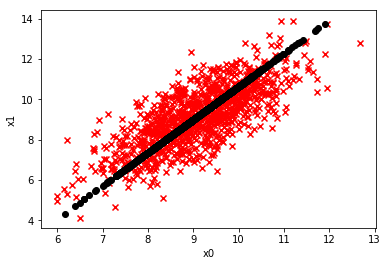

In [26]:
lowData2 , recData2 = pca2(x,k=1)
print lowData2.shape
print recData2.shape

plotFunc(x,recData2)